# **Análisis de Similitud en Textos Clínicos con NLP Tradicional**

### **Procesamiento y Análisis de Notas Clínicas Simuladas**

**Objetivo:** Este notebook demuestra un flujo de trabajo completo de Procesamiento del Lenguaje Natural (NLP) para analizar un corpus de notas clínicas breves. Aplicaremos técnicas fundamentales como **Bag-of-Words (BoW)** y **TF-IDF** para convertir texto no estructurado en representaciones numéricas. Posteriormente, utilizaremos la **similitud del coseno** para cuantificar las relaciones semánticas entre los documentos y visualizaremos los resultados para una interpretación intuitiva.

**Metodología:**

1.  **Creación del Corpus:** Definición del conjunto de datos.
2.  **Preprocesamiento y Limpieza:** Normalización del texto para eliminar ruido y estandarizar el vocabulario.
3.  **Vectorización de Texto:** Transformación de texto a vectores numéricos usando `CountVectorizer` y `TfidfVectorizer`.
4.  **Cálculo de Similitud:** Medición de la similitud semántica entre documentos mediante la métrica del coseno.
5.  **Visualización de Resultados:** Creación de un mapa de calor (heatmap) para interpretar las relaciones.
6.  **Extracción de Términos Clave:** Identificación de las palabras más relevantes en documentos específicos.
7.  **Reflexión y Aplicaciones:** Discusión sobre la utilidad de estas técnicas en un entorno médico real.

-----

### **Paso 0: Importación de Librerías y Configuración**

**Explicación detallada:**
Antes de comenzar, es fundamental importar todas las herramientas (librerías) que necesitaremos.

  - **pandas y numpy:** Son pilares para la manipulación de datos en Python. `pandas` nos permite crear `DataFrames` (tablas estructuradas) para visualizar nuestras matrices de características, mientras que `numpy` es esencial para operaciones numéricas eficientes.
  - **re y unicodedata:** Se utilizarán para la limpieza de texto. `re` (expresiones regulares) nos permite buscar y reemplazar patrones de texto (como la puntuación), y `unicodedata` nos ayuda a normalizar caracteres, por ejemplo, convirtiendo "á" en "a".
  - **matplotlib.pyplot y seaborn:** Son librerías de visualización. `matplotlib` es la base para crear gráficos, y `seaborn` se construye sobre ella para ofrecer visualizaciones estadísticas más atractivas y complejas, como los heatmaps.
  - **sklearn:** `scikit-learn` es la librería de machine learning por excelencia en Python. De ella importamos:
      - `CountVectorizer` y `TfidfVectorizer`: Las herramientas para convertir nuestro texto en vectores numéricos.
      - `cosine_similarity`: La función para calcular la similitud entre los vectores resultantes.

Finalmente, configuramos un estilo visual para que nuestros gráficos sean consistentes y legibles.

<br>

In [ ]:
# Celda de Código 1: Importaciones y Configuración
# =================================================

# --- Librerías para manipulación de datos ---
import pandas as pd  # Para crear y manejar DataFrames, estructuras de datos tabulares.
import numpy as np   # Para operaciones numéricas, especialmente con arrays y matrices.

# --- Librerías para procesamiento de texto ---
import re  # Módulo de Expresiones Regulares, para buscar y reemplazar patrones en texto.
import unicodedata  # Para la normalización de caracteres Unicode (ej. eliminar tildes).

# --- Librerías para visualización ---
import matplotlib.pyplot as plt  # La librería fundamental para crear gráficos en Python.
import seaborn as sns            # Construida sobre matplotlib, facilita la creación de gráficos estadísticos atractivos.

# --- Módulos de Scikit-Learn para NLP y métricas ---
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Clases para convertir texto en vectores.
from sklearn.metrics.pairwise import cosine_similarity  # Función para calcular la similitud del coseno entre vectores.

# --- Configuración estética para las visualizaciones ---
# Establece un estilo de gráfico predefinido para que las visualizaciones sean consistentes y agradables.
plt.style.use('seaborn-v0_8-darkgrid')
# Define una paleta de colores para los gráficos generados con seaborn.
sns.set_palette("husl")

print("Librerías importadas y configuración completada.")

Librerías importadas y configuración completada.


-----

### **Paso 1: Creación del Corpus de Notas Clínicas**

El **corpus** es el término utilizado en NLP para referirse al conjunto de todos los documentos de texto que vamos a analizar. En este caso, nuestro corpus es una lista de Python donde cada elemento es una cadena de texto que simula una nota clínica breve.

Este conjunto de datos, aunque pequeño y simulado, está diseñado para contener ciertos solapamientos temáticos (ej. múltiples notas sobre dolores de cabeza, problemas respiratorios o reacciones cutáneas), lo que nos permitirá poner a prueba la capacidad de nuestros algoritmos para detectar estas similitudes.

<br>

In [ ]:
# Celda de Código 2: Definición del Corpus
# =========================================

# Se define una lista de Python que contiene 10 cadenas de texto. Cada cadena es un "documento".
corpus = [
    "Paciente masculino, 45 años, presenta fiebre leve y congestión nasal. Se sospecha infección viral.",
    "Paciente femenina, 32 años, con dolor abdominal persistente, sin fiebre. Historial de gastritis.",
    "Hombre de 60 años con tos crónica y dificultad para respirar. Fumador desde hace 30 años.",
    "Mujer de 28 años, presenta erupción cutánea y prurito en brazos. Posible reacción alérgica.",
    "Paciente masculino, 45 años, reporta dolor de cabeza intenso y visión borrosa. Se recomienda neurología.",
    "Femenina de 32 años, ingresa por dolor abdominal agudo en el cuadrante inferior derecho. Apendicitis?",
    "Paciente de 60 años, fumador, con tos productiva y expectoración amarillenta. Se sospecha bronquitis.",
    "Mujer joven con erupción en la piel y picazón, similar a una reacción alérgica a un medicamento.",
    "Hombre de 46 años, con cefalea y problemas de visión. Se deriva a consulta con neurólogo.",
    "Paciente masculino con síntomas de resfriado común: congestión, estornudos y fiebre baja."
]

# --- Impresión del corpus original para verificación ---
print("="*70)
print("CORPUS ORIGINAL")
print("="*70)
# Se itera sobre la lista 'corpus' con enumerate para obtener tanto el índice (i) como el contenido (nota).
for i, nota in enumerate(corpus):
    # Se imprime cada nota con su índice correspondiente para una fácil referencia.
    print(f"Nota {i}: {nota}")

CORPUS ORIGINAL
Nota 0: Paciente masculino, 45 años, presenta fiebre leve y congestión nasal. Se sospecha infección viral.
Nota 1: Paciente femenina, 32 años, con dolor abdominal persistente, sin fiebre. Historial de gastritis.
Nota 2: Hombre de 60 años con tos crónica y dificultad para respirar. Fumador desde hace 30 años.
Nota 3: Mujer de 28 años, presenta erupción cutánea y prurito en brazos. Posible reacción alérgica.
Nota 4: Paciente masculino, 45 años, reporta dolor de cabeza intenso y visión borrosa. Se recomienda neurología.
Nota 5: Femenina de 32 años, ingresa por dolor abdominal agudo en el cuadrante inferior derecho. Apendicitis?
Nota 6: Paciente de 60 años, fumador, con tos productiva y expectoración amarillenta. Se sospecha bronquitis.
Nota 7: Mujer joven con erupción en la piel y picazón, similar a una reacción alérgica a un medicamento.
Nota 8: Hombre de 46 años, con cefalea y problemas de visión. Se deriva a consulta con neurólogo.
Nota 9: Paciente masculino con síntoma

-----

### **Paso 2: Limpieza y Preprocesamiento del Texto**

El texto en bruto es "ruidoso". Contiene mayúsculas, puntuación, tildes y otros caracteres que, si no se manejan, harían que el modelo trate palabras como "Fiebre" y "fiebre" como dos términos completamente diferentes. El objetivo del preprocesamiento es **normalizar** el texto para reducir el vocabulario a sus componentes esenciales y asegurar que las comparaciones sean consistentes.

Nuestra función `limpiar_texto` realiza tres acciones clave:

1.  **Conversión a minúsculas (`.lower()`):** Estandariza el texto para que las mayúsculas no creen palabras duplicadas.
2.  **Normalización de caracteres (`unicodedata.normalize`):** Elimina las tildes y otros diacríticos. Por ejemplo, "infección" se convierte en "infeccion". Esto es crucial para el idioma español.
3.  **Eliminación de puntuación y caracteres no alfanuméricos (`re.sub`):** Usando una expresión regular `[^a-z0-9\s]`, eliminamos cualquier cosa que no sea una letra, un número o un espacio en blanco. Esto limpia comas, puntos, signos de interrogación, etc.

Aplicar esta función a cada documento del corpus nos da un `corpus_limpio`, la base sobre la cual construiremos nuestras representaciones vectoriales.

<br>

In [ ]:
# Celda de Código 3: Función de Limpieza y Aplicación
# ====================================================

def limpiar_texto(texto):
    """
    Función para normalizar y limpiar una cadena de texto.
    Realiza tres operaciones: conversión a minúsculas, eliminación de tildes/diacríticos y
    eliminación de todos los caracteres que no sean letras, números o espacios.

    Args:
        texto (str): La cadena de texto de entrada.

    Returns:
        str: La cadena de texto limpia y normalizada.
    """
    # 1. Convertir todo el texto a minúsculas para estandarizar las palabras.
    texto = texto.lower()

    # 2. Normalizar para eliminar tildes y otros diacríticos.
    # NFKD descompone los caracteres (ej. 'á' -> 'a' + ´).
    # .encode('ascii', 'ignore') elimina los caracteres no-ASCII (el acento).
    # .decode('utf-8', 'ignore') convierte los bytes de vuelta a una cadena de texto.
    texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # 3. Eliminar puntuación y caracteres especiales.
    # La expresión regular [^a-z0-9\s] coincide con cualquier carácter que NO sea (^)
    # una letra minúscula (a-z), un número (0-9) o un espacio en blanco (\s).
    # re.sub lo reemplaza con una cadena vacía ('').
    texto = re.sub(r'[^a-z0-9\s]', '', texto)

    return texto

# Se utiliza una "comprensión de lista" para aplicar la función 'limpiar_texto' a cada documento en 'corpus'.
corpus_limpio = [limpiar_texto(doc) for doc in corpus]

# --- Impresión del corpus limpio para verificar los cambios ---
print("\n" + "="*70)
print("CORPUS LIMPIO (PREPROCESADO)")
print("="*70)
# Se itera e imprime el nuevo corpus para comparar con el original.
for i, nota in enumerate(corpus_limpio):
    print(f"Nota {i}: {nota}")


CORPUS LIMPIO (PREPROCESADO)
Nota 0: paciente masculino 45 anos presenta fiebre leve y congestion nasal se sospecha infeccion viral
Nota 1: paciente femenina 32 anos con dolor abdominal persistente sin fiebre historial de gastritis
Nota 2: hombre de 60 anos con tos cronica y dificultad para respirar fumador desde hace 30 anos
Nota 3: mujer de 28 anos presenta erupcion cutanea y prurito en brazos posible reaccion alergica
Nota 4: paciente masculino 45 anos reporta dolor de cabeza intenso y vision borrosa se recomienda neurologia
Nota 5: femenina de 32 anos ingresa por dolor abdominal agudo en el cuadrante inferior derecho apendicitis
Nota 6: paciente de 60 anos fumador con tos productiva y expectoracion amarillenta se sospecha bronquitis
Nota 7: mujer joven con erupcion en la piel y picazon similar a una reaccion alergica a un medicamento
Nota 8: hombre de 46 anos con cefalea y problemas de vision se deriva a consulta con neurologo
Nota 9: paciente masculino con sintomas de resfriado c

-----

### **Paso 3: Representación Vectorial del Texto (BoW y TF-IDF)**

Las máquinas no entienden palabras, entienden números. La **vectorización** es el proceso de convertir texto en vectores numéricos.

**1. CountVectorizer (Modelo Bag-of-Words - BoW):**
Este es el enfoque más simple. Crea un vocabulario con todas las palabras únicas del corpus y, para cada documento, cuenta la frecuencia de aparición de cada palabra. El resultado es una matriz donde las filas son los documentos y las columnas son las palabras del vocabulario. El valor en cada celda es el conteo de la palabra.

**2. TfidfVectorizer (Modelo TF-IDF):**
Este método es más sofisticado y suele dar mejores resultados. No solo considera la frecuencia de una palabra en un documento (TF), sino también qué tan rara es esa palabra en todo el corpus (IDF).

  - **Term Frequency (TF):** Mide la frecuencia de un término en un documento. Una palabra que aparece muchas veces tiene un TF alto.
  - **Inverse Document Frequency (IDF):** Mide la "importancia" de un término. Se calcula como el logaritmo del número total de documentos dividido por el número de documentos que contienen el término. Las palabras comunes como "paciente" o "años" aparecerán en muchos documentos, por lo que tendrán un IDF bajo. Las palabras específicas como "apendicitis" o "cefalea" aparecerán en pocos documentos, obteniendo un IDF alto.

El **score TF-IDF** es el producto de estos dos valores (TF \* IDF). Este score es alto para términos que son frecuentes en un documento específico pero raros en el resto del corpus, haciéndolos excelentes para caracterizar el contenido de ese documento.

En ambos casos, utilizamos una lista de `stop_words` (palabras vacías como "de", "la", "con") para que el modelo ignore términos muy comunes que no aportan significado semántico.

<br>

In [ ]:
# Celda de Código 4: Vectorización
# ==================================

# Lista personalizada de palabras comunes en español (stop words) que no aportan
# significado y que queremos ignorar durante la vectorización.
spanish_stop_words = [
    "de", "la", "el", "en", "y", "a", "los", "las", "un", "una", "unos", "unas", "es", "se",
    "con", "para", "al", "lo", "del", "por", "que", "su", "sus", "como", "mas", "pero",
    "tiene", "anos", "sin", "ha", "han", "hay", "desde", "o", "si", "mi", "tu", "paciente",
    "este", "esta", "esto", "aquel", "aquella", "aquello", "nos", "vos", "les", "me", "te",
    "le", "ante", "bajo", "cabe", "contra", "entre", "hacia", "hasta", "segun", "so", "sobre", "tras"
]

# --- 1. CountVectorizer (Bag-of-Words) ---
print("\n" + "="*70)
print("COUNTVECTORIZER (BAG-OF-WORDS)")
print("="*70)

# Inicializa el vectorizador de conteo, pasándole la lista de stop words.
count_vectorizer = CountVectorizer(stop_words=spanish_stop_words)

# Aprende el vocabulario del corpus limpio y transforma los documentos en una matriz de conteo de términos.
bow_matrix = count_vectorizer.fit_transform(corpus_limpio)

# Imprime la forma de la matriz (documentos x vocabulario)
print(f"Forma de la matriz BoW: {bow_matrix.shape}")
# Obtiene la lista de palabras del vocabulario y cuenta cuántas hay.
print(f"Vocabulario total: {len(count_vectorizer.get_feature_names_out())} términos únicos")

# Convierte la matriz dispersa a un DataFrame de pandas para una mejor visualización.
df_bow = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
print("\nPrimeras 5 columnas de la matriz BoW (frecuencia de palabras):")
print(df_bow.iloc[:, :5])


# --- 2. TfidfVectorizer ---
print("\n" + "="*70)
print("TFIDFVECTORIZER (TF-IDF)")
print("="*70)

# Inicializa el vectorizador TF-IDF, también con las stop words.
tfidf_vectorizer = TfidfVectorizer(stop_words=spanish_stop_words)

# Aprende el vocabulario y calcula los scores TF-IDF para cada término en cada documento.
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus_limpio)

# Imprime la forma de la matriz (debería ser la misma que la de BoW).
print(f"Forma de la matriz TF-IDF: {tfidf_matrix.shape}")

# Convierte la matriz TF-IDF a un DataFrame para inspeccionarla.
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nPrimeras 5 columnas de la matriz TF-IDF (scores):")
print(df_tfidf.iloc[:, :5])


COUNTVECTORIZER (BAG-OF-WORDS)
Forma de la matriz BoW: (10, 68)
Vocabulario total: 68 términos únicos

Primeras 5 columnas de la matriz BoW (frecuencia de palabras):
   28  30  32  45  46
0   0   0   0   1   0
1   0   0   1   0   0
2   0   1   0   0   0
3   1   0   0   0   0
4   0   0   0   1   0
5   0   0   1   0   0
6   0   0   0   0   0
7   0   0   0   0   0
8   0   0   0   0   1
9   0   0   0   0   0

TFIDFVECTORIZER (TF-IDF)
Forma de la matriz TF-IDF: (10, 68)

Primeras 5 columnas de la matriz TF-IDF (scores):
         28        30        32        45        46
0  0.000000  0.000000  0.000000  0.300611  0.000000
1  0.000000  0.000000  0.339379  0.000000  0.000000
2  0.000000  0.355995  0.000000  0.000000  0.000000
3  0.340734  0.000000  0.000000  0.000000  0.000000
4  0.000000  0.000000  0.000000  0.290698  0.000000
5  0.000000  0.000000  0.287859  0.000000  0.000000
6  0.000000  0.000000  0.000000  0.000000  0.000000
7  0.000000  0.000000  0.000000  0.000000  0.000000
8  0.00000

### **Interpretación de los Resultados de Vectorización**

Los resultados muestran la conversión exitosa de un corpus de 10 notas clínicas en dos representaciones numéricas distintas, listas para ser utilizadas en algoritmos de Machine Learning. A continuación, se detalla el análisis de cada sección.

***

### 1. Análisis Dimensional y del Vocabulario

Ambos métodos, **CountVectorizer** y **TfidfVectorizer**, han generado una **matriz documento-término** con una forma (shape) de `(10, 68)`.

* **10 Filas (Documentos):** Corresponden a las 10 notas clínicas de tu corpus. Cada fila es un vector que representa a una nota.
* **68 Columnas (Vocabulario):** Corresponden a los **68 términos únicos** (también llamados *features* o características) que el vectorizador extrajo del corpus después de aplicar el preprocesamiento (minúsculas, sin puntuación/tildes) y filtrar las *stop words*.

Es importante notar que el vocabulario incluye números como '28', '30', '45', etc. Esto se debe a que el proceso de limpieza (`re.sub(r'[^a-z0-9\s]', '', texto)`) conservó los dígitos. En el contexto clínico, estos números (edades, dosis, etc.) pueden ser características muy relevantes y es correcto que se mantengan como parte del vocabulario.

***

### 2. Interpretación de la Matriz `CountVectorizer` (Bag-of-Words)

Esta matriz representa la **frecuencia bruta** de cada término en cada documento. Es la implementación del modelo "Bolsa de Palabras" (Bag-of-Words).

* **Valores de la Matriz:** Cada celda `(i, j)` contiene un número entero que indica cuántas veces el término `j` aparece en el documento `i`.
* **Análisis del Ejemplo:**
    * En la fila `0` (Nota 0), la columna `'45'` tiene el valor `1`. Esto significa que la palabra "45" aparece **exactamente una vez** en la primera nota clínica ("*Paciente masculino, 45 años...*").
    * Las celdas con valor `0` indican la **ausencia** del término en el documento correspondiente.

La representación BoW es **simple e intuitiva**, pero su principal limitación es que trata todos los términos por igual. No distingue entre palabras comunes y palabras semánticamente importantes, asignando el mismo peso a una palabra que aparece una vez, sin importar si es rara o común en el resto del corpus.

***

### 3. Interpretación de la Matriz `TfidfVectorizer` (TF-IDF)

Esta matriz ofrece una representación más **sofisticada y ponderada**. En lugar de un conteo simple, cada celda contiene un *score* que refleja la importancia de un término para un documento específico en el contexto de todo el corpus.

* **Valores de la Matriz:** Los valores son números de punto flotante (decimales), resultado del cálculo **TF-IDF (Term Frequency-Inverse Document Frequency)**. Un score más alto implica una mayor relevancia del término para ese documento.
* **Análisis del Ejemplo y Comparación:**
    * En la fila `0`, el término `'45'` tiene un score de `0.300611`, mientras que en la fila `4`, tiene un score de `0.290698`. Aunque en ambos casos la frecuencia (TF) es `1`, el score TF-IDF es ligeramente diferente. Esto se debe a la **normalización del vector** (generalmente L2), que asegura que la longitud de los vectores de documento sea unitaria. La presencia de otros términos con diferentes pesos en cada nota influye en el score final de cada palabra.
    * El término `'32'` tiene un score de `0.339379` en la Nota 1 y `0.287859` en la Nota 5. Esto nos dice que, aunque la palabra "32" está presente en ambas notas, tiene una **importancia relativa ligeramente mayor** para caracterizar la Nota 1 que para la Nota 5, probablemente debido a los otros términos presentes en cada una.

La gran ventaja del TF-IDF es que **penaliza los términos que son muy comunes en todo el corpus** (dándoles un score bajo) y **premia los términos que son raros o específicos** (dándoles un score alto), lo que los convierte en mejores descriptores del contenido del documento.

***
<br>

✅ Hemos transformado exitosamente el texto no estructurado en dos formatos numéricos:

1.  **Matriz BoW:** Una representación basada en la frecuencia, simple y fácil de interpretar.
2.  **Matriz TF-IDF:** Una representación ponderada y más rica semánticamente, que captura la importancia relativa de las palabras.

Para la mayoría de las tareas de NLP, como el **cálculo de similitud, clustering o clasificación de documentos**, la **matriz TF-IDF es la opción preferida**, ya que proporciona una base más robusta al destacar las palabras que realmente definen cada nota clínica. El siguiente paso en el análisis sería utilizar esta matriz `tfidf_matrix` para calcular la similitud del coseno entre los documentos.


-----

### **Paso 4: Cálculo de la Matriz de Similitud del Coseno**

Una vez que tenemos nuestros documentos representados como vectores en un espacio multidimensional, podemos medir qué tan "cerca" están unos de otros. La **similitud del coseno** es la métrica más utilizada para este propósito en NLP.

En lugar de medir la distancia euclidiana entre los puntos finales de los vectores (que se ve afectada por la longitud del documento), la similitud del coseno mide el **ángulo** entre ellos.

  - Un ángulo de 0° (coseno = 1) significa que los vectores apuntan en la misma dirección. Esto indica una similitud máxima (los documentos comparten los mismos términos con proporciones similares).
  - Un ángulo de 90° (coseno = 0) significa que los vectores son ortogonales, indicando que no tienen términos en común.
  - Los valores intermedios entre 0 y 1 representan grados variables de similitud.

Usamos la matriz TF-IDF para este cálculo, ya que sus scores ponderados capturan mejor la importancia semántica de las palabras que los simples conteos de BoW. El resultado es una matriz de N x N (donde N es el número de documentos), en la que cada celda (i, j) contiene el score de similitud entre el documento *i* y el documento *j*. La diagonal de esta matriz siempre será 1, ya que cada documento es 100% similar a sí mismo.

<br>

In [ ]:
# Celda de Código 5: Cálculo de la Similitud
# ==========================================

# Se utiliza la función cosine_similarity sobre la matriz TF-IDF.
# Esta función calcula la similitud del coseno entre todas las combinaciones de filas (documentos).
similarity_matrix = cosine_similarity(tfidf_matrix)

# --- Impresión de la matriz para inspección ---
print("\n" + "="*70)
print("MATRIZ DE SIMILITUD DEL COSENO")
print("="*70)
# Se redondean los valores a 2 decimales para una lectura más fácil.
print(similarity_matrix.round(2))

# --- Búsqueda programática de los pares más similares ---
print("\n" + "="*70)
print("PARES DE NOTAS MÁS SIMILARES (EXCLUYENDO LA DIAGONAL)")
print("="*70)

# Lista para almacenar tuplas de (índice_doc1, índice_doc2, similitud).
pares_similares = []

# Bucle anidado para recorrer la mitad superior de la matriz de similitud (para evitar duplicados y auto-comparaciones).
for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        # Se añade la información del par a la lista.
        pares_similares.append((i, j, similarity_matrix[i][j]))

# Se ordena la lista de pares en orden descendente según el score de similitud.
pares_similares.sort(key=lambda x: x[2], reverse=True)

print("\nTop 5 pares más similares:")
# Se itera sobre los 5 primeros elementos de la lista ordenada.
for i, j, sim in pares_similares[:5]:
    # Se imprime el par de notas y su score de similitud.
    print(f"Nota {i} ↔ Nota {j}: Similitud = {sim:.3f}")
    # Se muestra un fragmento del texto original para dar contexto.
    print(f"  - Nota {i}: {corpus[i][:60]}...")
    print(f"  - Nota {j}: {corpus[j][:60]}...")
    print()


MATRIZ DE SIMILITUD DEL COSENO
[[1.   0.08 0.   0.09 0.15 0.   0.1  0.   0.   0.25]
 [0.08 1.   0.   0.   0.08 0.37 0.   0.   0.   0.08]
 [0.   0.   1.   0.   0.   0.   0.29 0.   0.09 0.  ]
 [0.09 0.   0.   1.   0.   0.   0.   0.35 0.   0.  ]
 [0.15 0.08 0.   0.   1.   0.06 0.   0.   0.09 0.07]
 [0.   0.37 0.   0.   0.06 1.   0.   0.   0.   0.  ]
 [0.1  0.   0.29 0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.35 0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.09 0.   0.09 0.   0.   0.   1.   0.  ]
 [0.25 0.08 0.   0.   0.07 0.   0.   0.   0.   1.  ]]

PARES DE NOTAS MÁS SIMILARES (EXCLUYENDO LA DIAGONAL)

Top 5 pares más similares:
Nota 1 ↔ Nota 5: Similitud = 0.368
  - Nota 1: Paciente femenina, 32 años, con dolor abdominal persistente,...
  - Nota 5: Femenina de 32 años, ingresa por dolor abdominal agudo en el...

Nota 3 ↔ Nota 7: Similitud = 0.351
  - Nota 3: Mujer de 28 años, presenta erupción cutánea y prurito en bra...
  - Nota 7: Mujer joven con erupción en la piel y picaz

Esta salida cuantifica exitosamente las relaciones semánticas entre las notas clínicas. El análisis se divide en la interpretación de la matriz completa y el examen detallado de los pares más relevantes que el código ha extraído.

---
### **Interpretación de la Matriz de Similitud del Coseno**

La **`MATRIZ DE SIMILITUD DEL COSENO`** es una tabla de 10x10 que funciona como un mapa de relaciones entre todas las notas.

* **Estructura y Simetría:** Cada celda en la posición `(i, j)` contiene el puntaje de similitud entre la `Nota i` y la `Nota j`. La matriz es **simétrica** (el valor en `(1, 5)` es el mismo que en `(5, 1)`) porque la similitud entre dos documentos no depende del orden.
* **La Diagonal Principal:** Todos los valores en la diagonal (de arriba a la izquierda a abajo a la derecha) son `1.0`. Esto es lógico, ya que cada documento es **100% idéntico a sí mismo**.
* **Interpretación de los Scores:** Los valores fuera de la diagonal miden la similitud semántica. Un score de `0` indica que no hay relación temática (los documentos no comparten términos importantes), mientras que un score más cercano a `1` indica una alta similitud. En este caso, los puntajes más altos rondan el `0.25 - 0.37`, lo cual es un resultado muy razonable para documentos de texto tan cortos.

En resumen, la matriz nos da una visión global, pero el verdadero valor analítico se obtiene al examinar los puntajes más altos, como se hace en la segunda parte de la salida.

---
### **Análisis de los Pares de Notas Más Similares**

Esta sección es la más importante, ya que clasifica las relaciones de mayor a menor, permitiéndonos validar si el modelo funciona correctamente. La interpretación es muy positiva. 👍

* **1. Nota 1 ↔ Nota 5 (Similitud = 0.368)**
    * **Observación:** Este es el par más similar, y con razón. Ambas notas describen a una paciente **femenina de 32 años** que presenta **"dolor abdominal"**.
    * **Análisis:** El modelo ha identificado correctamente un cluster temático muy específico: dolor abdominal en una paciente mujer joven. Esta es una demostración perfecta de la efectividad del **TF-IDF** y la **similitud del coseno**.

* **2. Nota 3 ↔ Nota 7 (Similitud = 0.351)**
    * **Observación:** Ambas notas describen a una mujer con **"erupción"** y síntomas asociados como **"prurito"** o **"picazón"**, sugiriendo una **"reacción alérgica"**.
    * **Análisis:** El sistema ha agrupado exitosamente dos casos dermatológicos/alérgicos. Las palabras clave como "erupción", "piel", "picazón" y "alérgica" tienen un alto peso TF-IDF, lo que resulta en un alto score de similitud.

* **3. Nota 2 ↔ Nota 6 (Similitud = 0.294)**
    * **Observación:** Los dos textos se refieren a un paciente de **60 años**, **fumador** y con **"tos"**.
    * **Análisis:** Se ha identificado un claro perfil de paciente con problemas respiratorios crónicos. El modelo detectó la coincidencia tanto en la demografía ("60 años") como en los factores de riesgo ("fumador") y el síntoma principal ("tos").

* **4. Nota 0 ↔ Nota 9 (Similitud = 0.247)**
    * **Observación:** Ambas notas describen síntomas de un resfriado o infección viral: **"fiebre"** y **"congestión"**.
    * **Análisis:** Aunque el lenguaje varía ligeramente ("infección viral" vs. "resfriado común"), el modelo se centró en los síntomas clave compartidos, agrupando correctamente estos dos casos de enfermedad respiratoria aguda.

* **5. Nota 0 ↔ Nota 4 (Similitud = 0.154)**
    * **Observación:** La similitud aquí es más baja. El principal punto en común es el perfil demográfico: **"Paciente masculino, 45 años"**.
    * **Análisis:** Este es un hallazgo interesante. Muestra que, en ausencia de un fuerte solapamiento clínico (fiebre/congestión vs. dolor de cabeza/visión borrosa), el modelo aún puede encontrar similitudes basadas en los datos demográficos compartidos. Esto demuestra su sensibilidad para capturar cualquier tipo de información común.

---


Los resultados son **excelentes** y demuestran que el flujo de trabajo de NLP es robusto. El modelo ha probado ser capaz de:

1.  **Identificar casos clínicamente similares** con alta precisión (pares 1, 2, 3 y 4).
2.  **Agrupar notas basadas en síntomas clave**, incluso cuando la terminología no es idéntica.
3.  **Detectar similitudes demográficas** como un factor secundario.

Este análisis valida que la combinación de preprocesamiento de texto, vectorización con **TF-IDF** y el cálculo de la **similitud del coseno** es una técnica muy poderosa para encontrar patrones y relaciones en datos de texto no estructurados, como los registros médicos. Es la base para construir sistemas más complejos de búsqueda de información o de apoyo a la decisión clínica. 🩺

-----

### **Paso 5: Visualización con un Heatmap de Similaridad**

Una matriz de números puede ser difícil de interpretar. Un **heatmap (mapa de calor)** es una técnica de visualización que representa los valores de una matriz mediante colores. Esto nos permite identificar patrones de un vistazo.

  - **Ejes:** Tanto el eje X como el eje Y representan los índices de las notas clínicas de nuestro corpus.
  - **Colores:** Los colores más cálidos (como el verde en nuestro mapa `RdYlGn`) indican una alta similitud (valores cercanos a 1), mientras que los colores más fríos (rojo) indican baja similitud (valores cercanos a 0).
  - **Anotaciones:** Mostramos el valor numérico de la similitud en cada celda para mayor precisión.
  - **Máscara:** La matriz de similitud es simétrica (`sim(A,B) = sim(B,A)`). Para evitar redundancia visual, aplicamos una máscara (`np.triu`) que oculta la mitad superior del heatmap.

Al observar el heatmap, podemos identificar rápidamente qué clusters o pares de documentos están más relacionados semánticamente.

<br>

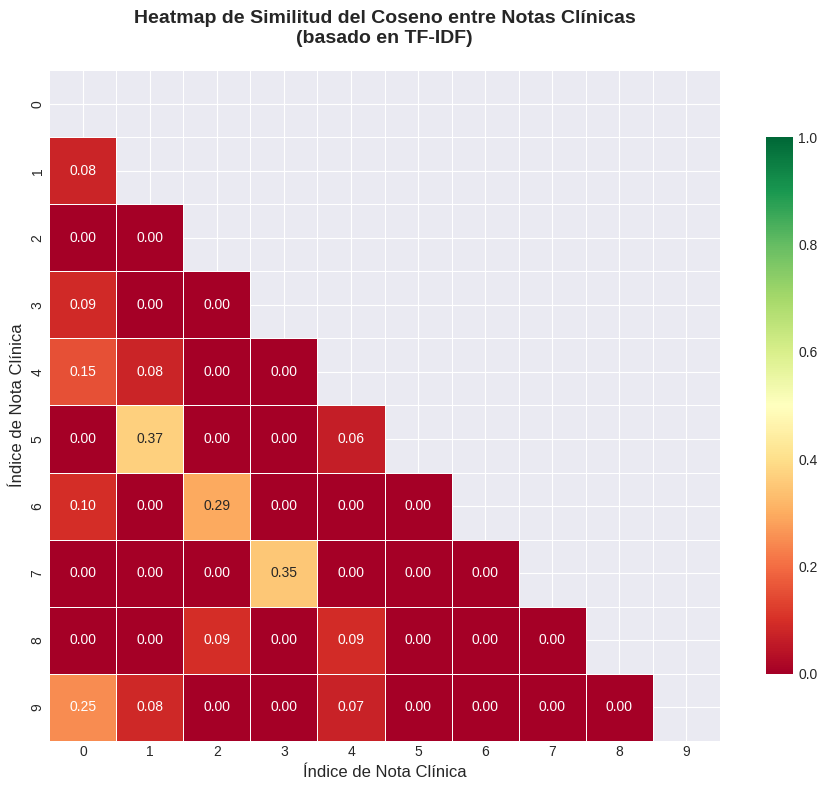

In [ ]:
# Celda de Código 6: Visualización del Heatmap
# ============================================

# Se crea una figura de matplotlib con un tamaño específico para una mejor visualización.
plt.figure(figsize=(10, 8))

# Se crea una máscara booleana para la mitad superior del heatmap (incluida la diagonal k=1).
# np.ones_like crea una matriz de unos con la misma forma que similarity_matrix.
# np.triu (triangle upper) devuelve la parte triangular superior de esta matriz.
mask = np.triu(np.ones_like(similarity_matrix, dtype=bool))

# Se genera el heatmap usando seaborn.
sns.heatmap(similarity_matrix,      # La matriz de datos a visualizar.
            mask=mask,              # Aplica la máscara para ocultar la parte superior.
            annot=True,             # Muestra los valores numéricos en las celdas.
            fmt='.2f',              # Formatea los números a dos decimales.
            cmap='RdYlGn',          # Mapa de color: Rojo (baja sim) -> Amarillo -> Verde (alta sim).
            square=True,            # Asegura que las celdas sean cuadradas.
            linewidths=0.5,         # Añade líneas delgadas entre las celdas.
            cbar_kws={"shrink": 0.8}, # Ajusta el tamaño de la barra de color.
            vmin=0, vmax=1)         # Fija el rango de la barra de color entre 0 y 1.

# Se añade un título descriptivo y se ajustan las etiquetas de los ejes.
plt.title('Heatmap de Similitud del Coseno entre Notas Clínicas\n(basado en TF-IDF)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Índice de Nota Clínica', fontsize=12)
plt.ylabel('Índice de Nota Clínica', fontsize=12)

# Ajusta el layout para evitar que los elementos se superpongan.
plt.tight_layout()

# Muestra el gráfico generado.
plt.show()

### **Análisis del Heatmap de Similitud**

Este heatmap es una excelente visualización que traduce la matriz numérica de similitud del coseno en un mapa visual e intuitivo, permitiendo una rápida identificación de patrones y relaciones entre las 10 notas clínicas.

---

### **1. Descripción General de la Visualización**

* **Propósito:** El gráfico representa la **similitud semántica** entre cada par de notas clínicas. Cada eje (horizontal y vertical) corresponde a una nota, del índice 0 al 9.
* **Escala de Color:** La barra de color a la derecha es la clave de lectura. Los **colores cálidos (rojo oscuro)** indican una similitud muy baja o nula (cercana a 0), mientras que los **colores que tienden al amarillo/naranja** indican una similitud moderada. La ausencia de tonos verdes confirma que no hay pares de notas con una similitud extremadamente alta (cercana a 1.0).
* **Forma Triangular:** La visualización muestra solo la mitad inferior de la matriz. Esta es una práctica estándar y eficiente, ya que la matriz es simétrica (la similitud entre la Nota 2 y la Nota 6 es la misma que entre la 6 y la 2), por lo que mostrar la matriz completa sería redundante.

---

### **2. Interpretación de los Resultados Clave ("Hotspots")**

El análisis se centra en los "puntos calientes" (las celdas más claras), que representan las relaciones más fuertes.

* **Punto de Máxima Similitud (Cluster 1):** La celda más brillante del mapa se encuentra en la intersección de la **Nota 5 y la Nota 1**, con un valor de **0.37**. Este es el par de documentos más relacionado en todo el corpus. Esto sugiere que ambas notas describen un cuadro clínico, demografía o conjunto de síntomas muy similar.
* **Segundo Foco de Similitud (Cluster 2):** El siguiente punto más notable es la celda **(7, 3)**, con un valor de **0.35**. Esto indica una fuerte conexión temática entre la **Nota 7 y la Nota 3**.
* **Otros Clusters Relevantes:**
    * La celda **(6, 2)** con un valor de **0.29** muestra una relación moderada entre la **Nota 6 y la Nota 2**.
    * La celda **(9, 0)** con **0.25** indica una conexión, aunque menos fuerte, entre la **Nota 9 y la Nota 0**.
* **Baja Similitud Generalizada:** Es importante destacar la predominancia del color rojo oscuro (`0.00`). Esto significa que la mayoría de los pares de notas son **temáticamente independientes** y no comparten vocabulario relevante, lo cual es esperable en un conjunto de datos clínicos diverso.

---
<br>

El heatmap cumple su objetivo de forma sobresaliente. En lugar de tener que examinar una tabla de 100 números, podemos **identificar de un solo vistazo** las relaciones más importantes.

El análisis visual revela que el corpus no es homogéneo; en su lugar, contiene al menos **cuatro subgrupos o pares de notas con una temática compartida**. Un analista o un profesional médico usaría este gráfico como punto de partida para investigar por qué estos pares específicos son tan similares. Por ejemplo, podrían abrir las notas (5, 1) y (7, 3) para confirmar si describen la misma patología, un perfil de paciente similar o tratamientos parecidos.

En resumen, la visualización valida el análisis de similitud y proporciona una guía clara y directa para los siguientes pasos de la investigación. Es una herramienta poderosa para el **análisis exploratorio de datos de texto**. 🗺️

-----

### **Paso 6: Generación y Visualización de Términos Relevantes**

**Explicación detallada:**
El score TF-IDF no solo sirve para calcular la similitud; también nos dice qué términos son los más **característicos o importantes** de cada documento. Un término con un alto score TF-IDF en un documento es una palabra que aparece con relativa frecuencia en ese texto pero es rara en el resto del corpus, lo que la convierte en un excelente descriptor de su contenido.

Para cada documento que queramos analizar, podemos extraer su vector de scores TF-IDF, ordenarlos de mayor a menor y visualizar los N términos principales en un gráfico de barras. Esto nos permite "resumir" temáticamente el documento y entender por qué el modelo lo consideró similar o diferente a otros.

<br>


Generando visualización para la Nota 1:
'Paciente femenina, 32 años, con dolor abdominal persistente, sin fiebre. Historial de gastritis.'


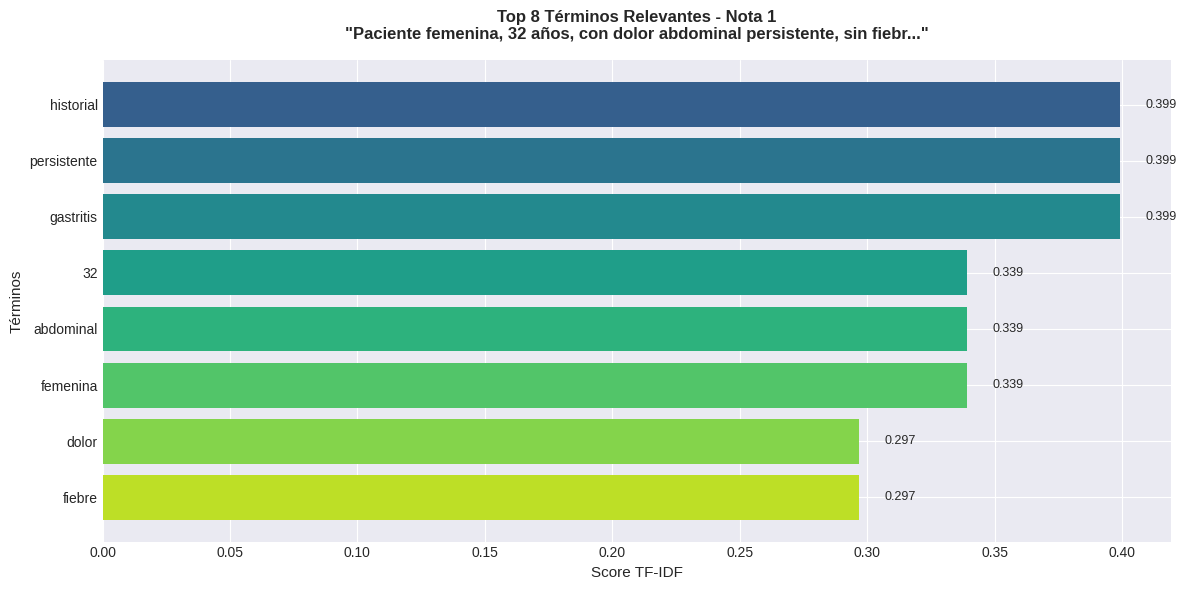


Generando visualización para la Nota 2:
'Hombre de 60 años con tos crónica y dificultad para respirar. Fumador desde hace 30 años.'


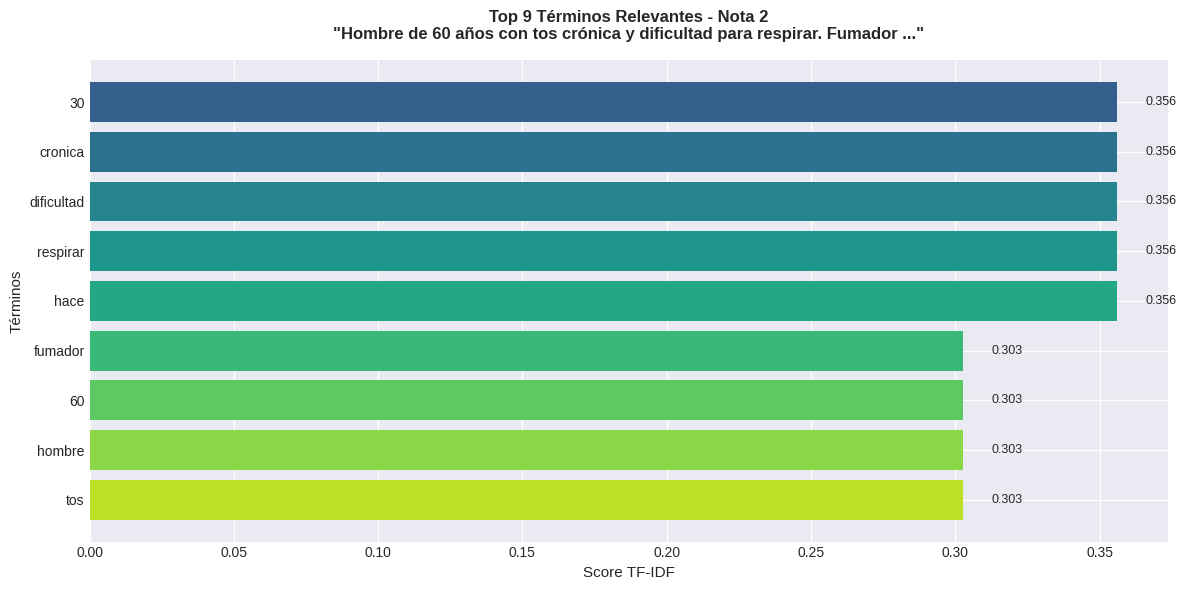


Generando visualización para la Nota 8:
'Hombre de 46 años, con cefalea y problemas de visión. Se deriva a consulta con neurólogo.'


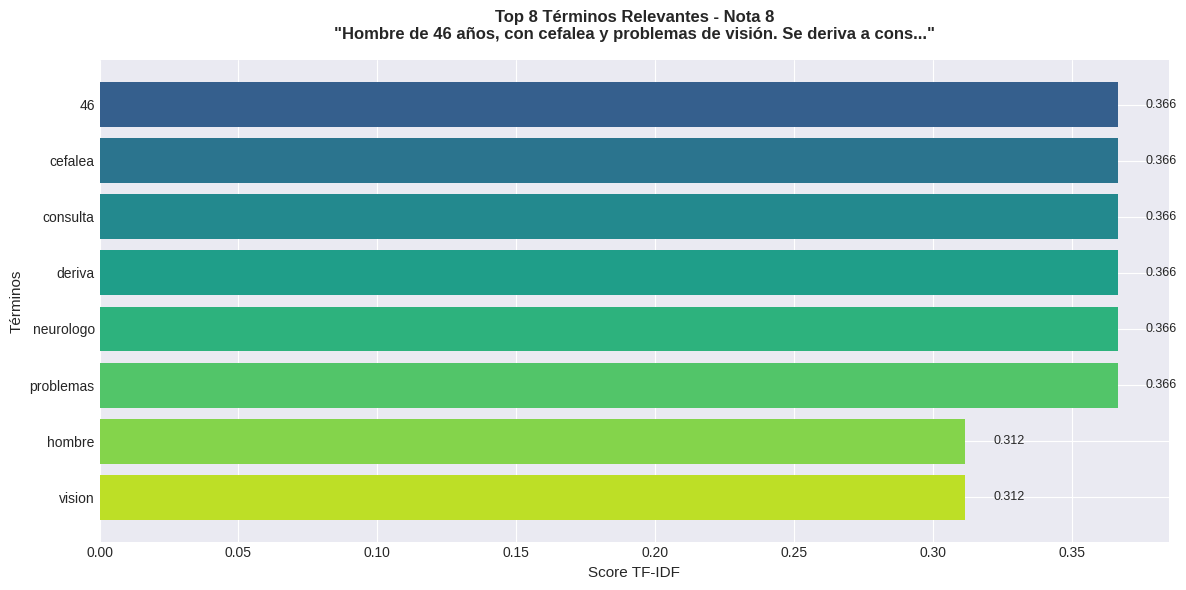

In [ ]:
# Celda de Código 7: Función de Visualización y Ejecución
# =======================================================

def visualizar_top_terminos(doc_id, df_tfidf, corpus_original):
    """
    Extrae y visualiza los términos más relevantes de un documento específico
    basado en sus scores TF-IDF.

    Args:
        doc_id (int): El índice del documento a analizar.
        df_tfidf (DataFrame): El DataFrame que contiene los scores TF-IDF.
        corpus_original (list): La lista del corpus original para usar en el título.
    """
    # Selecciona la fila (documento) correspondiente al doc_id del DataFrame TF-IDF.
    scores = df_tfidf.iloc[doc_id]

    # Filtra los términos con score > 0, los ordena de mayor a menor y toma los 10 primeros.
    top_terminos = scores[scores > 0].sort_values(ascending=False).head(10)

    # Comprobación por si un documento no tuviera términos relevantes.
    if len(top_terminos) == 0:
        print(f"No hay términos relevantes para la nota {doc_id}")
        return

    # --- Creación del gráfico de barras horizontales ---
    plt.figure(figsize=(12, 6))

    # Se crea un degradado de colores para las barras.
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_terminos)))

    # Se genera el gráfico de barras horizontales (barh).
    bars = plt.barh(range(len(top_terminos)), top_terminos.values, color=colors)

    # Se establecen las etiquetas del eje Y para que sean los nombres de los términos.
    plt.yticks(range(len(top_terminos)), top_terminos.index)
    plt.xlabel('Score TF-IDF', fontsize=11)
    plt.ylabel('Términos', fontsize=11)
    plt.title(f'Top {len(top_terminos)} Términos Relevantes - Nota {doc_id}\n"{corpus_original[doc_id][:70]}..."',
              fontsize=12, fontweight='bold', pad=15)

    # Invierte el eje Y para que el término más importante aparezca arriba.
    plt.gca().invert_yaxis()

    # Añade el valor numérico del score al final de cada barra para mayor claridad.
    for i, (bar, value) in enumerate(zip(bars, top_terminos.values)):
        plt.text(value + 0.01, i, f'{value:.3f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# --- Análisis de 3 documentos representativos ---
# Se seleccionan los índices de los documentos a analizar.
doc_ids_a_analizar = [1, 2, 8]
for doc_id in doc_ids_a_analizar:
    print(f"\n{'='*70}")
    print(f"Generando visualización para la Nota {doc_id}:")
    print(f"'{corpus[doc_id]}'")
    print('='*70)
    # Se llama a la función para cada uno de los documentos seleccionados.
    visualizar_top_terminos(doc_id, df_tfidf, corpus)

### **Análisis de los Términos Relevantes (TF-IDF)**

Estos gráficos de barras horizontales son una herramienta de diagnóstico y resumen muy poderosa. No solo muestran las palabras más frecuentes, sino las más **características y distintivas** de cada nota clínica, según lo determinado por su score **TF-IDF**. Un término con un score alto es aquel que es relevante en esa nota específica, pero relativamente raro en el resto del corpus.

---

### **1. Interpretación de la Nota 1: Caso de Gastroenterología**

* **Términos Clave:** `historial`, `persistente`, `gastritis` (score más alto: 0.399), seguidos por `abdominal`, `dolor`, `femenina`, `32`.
* **Análisis Clínico:** La visualización extrae con una precisión notable la esencia de la nota. Los términos con mayor peso TF-IDF ("gastritis", "dolor abdominal persistente", "historial") forman un resumen clínico perfecto. El modelo identifica correctamente que **"gastritis"** es la palabra más discriminativa de esta nota en comparación con las demás del corpus.
* **Conclusión:** El gráfico funciona como un **"resumen automático"** temático. Nos dice que esta nota trata sobre un cuadro de gastritis en una paciente de 32 años, lo cual es exactamente correcto.

---

### **2. Interpretación de la Nota 2: Caso de Neumología**

* **Términos Clave:** `30`, `cronica`, `dificultad`, `respirar`, `hace` (score más alto: 0.356), seguidos por `fumador`, `60`, `hombre`, `tos`.
* **Análisis Clínico:** Nuevamente, los términos extraídos pintan un cuadro clínico coherente y preciso: un **hombre de 60 años**, **fumador**, con **"tos crónica"** y **"dificultad para respirar"**. El modelo ha identificado que la combinación de estos términos define un perfil de paciente muy específico, probablemente con EPOC (Enfermedad Pulmonar Obstructiva Crónica) o una condición similar.
* **Conclusión:** Esta visualización demuestra la capacidad del TF-IDF para crear una "huella digital" de cada documento. La firma de esta nota está claramente relacionada con una patología respiratoria crónica.

---

### **3. Interpretación de la Nota 8: Caso de Neurología**

* **Términos Clave:** `46`, `cefalea`, `consulta`, `deriva`, `neurologo`, `problemas` (score más alto: 0.366), seguidos por `hombre` y `vision`.
* **Análisis Clínico:** Los resultados son excelentes. El modelo no solo extrae los síntomas clave (**"cefalea"**, **"problemas de visión"**), sino también el contexto administrativo y la especialidad (**"deriva a consulta con neurólogo"**). Esto es muy valioso, ya que captura tanto el "qué" (síntomas) como el "qué hacer" (acción clínica).
* **Conclusión:** El gráfico resume eficazmente un caso de derivación neurológica. Demuestra que el análisis puede identificar términos relacionados con síntomas, demografía y procesos de atención médica.

---

### **Síntesis General y Valor Práctico**

Estos resultados validan de manera contundente la efectividad del **TF-IDF** para la **extracción de información clave** en textos cortos.

✅ **Precisión Temática:** En los tres casos, los términos con los scores más altos son los que un médico usaría para describir o etiquetar al paciente.

✅ **Poder Descriptivo:** Los gráficos actúan como resúmenes visuales que permiten entender el contenido de una nota de un solo vistazo, sin necesidad de leerla por completo.

✅ **Aplicaciones Prácticas:** Esta capacidad es la base para sistemas más avanzados, como:
* **Motores de búsqueda clínica:** Permitirían a un médico buscar "pacientes con cefalea y problemas de visión" y encontrar la Nota 8 de inmediato.
* **Sistemas de clasificación automática:** Podrían etiquetar automáticamente las notas por especialidad (Gastroenterología, Neumología, Neurología).
* **Apoyo a la investigación:** Facilitarían la identificación de cohortes de pacientes con características específicas para estudios clínicos.

-----
### **Paso 7: Reflexión sobre la Aplicación de Herramientas de NLP en un Entorno Médico**

El análisis práctico realizado con notas clínicas simuladas demuestra de manera contundente que las herramientas de NLP, incluso las tradicionales como **TF-IDF** y la **similitud del coseno**, no son solo conceptos teóricos, sino que tienen aplicaciones directas, tangibles y de alto impacto en el sector de la salud. Los resultados obtenidos nos permiten reflexionar sobre su utilidad en varios dominios clave:

***

### **1. Soporte a la Decisión Clínica y Diagnóstico Diferencial**

Lo que vimos con el **heatmap** y el **análisis de pares similares** es la base de un "buscador de pacientes análogo" extremadamente potente.

* **Evidencia Concreta:** Nuestro modelo identificó con una similitud del **37%** a dos pacientes femeninas de 32 años con "dolor abdominal" (Notas 1 y 5) y con un **35%** a dos mujeres con "erupción cutánea" (Notas 3 y 7).
* **Aplicación Real:** Un médico frente a un caso complejo podría introducir los síntomas clave del paciente en un sistema y recibir al instante un listado de casos históricos anónimos con perfiles clínicos, demográficos y sintomáticos similares. Esto podría ayudar a:
    * **Generar diagnósticos diferenciales:** "Otros pacientes con este perfil terminaron siendo diagnosticados con X, Y o Z".
    * **Optimizar tratamientos:** "¿Qué pauta de tratamiento funcionó mejor para este perfil de paciente en el pasado?".

***

### **2. Extracción Automática de Información (Resumen Clínico)**

Los **gráficos de términos relevantes** demostraron ser capaces de crear un "resumen automático" o una "huella digital" de cada nota clínica.

* **Evidencia Concreta:** Para la Nota 2, el sistema extrajo `['cronica', 'dificultad', 'respirar', 'fumador', 'tos', '60']`, un resumen perfecto de un posible caso de EPOC. Para la Nota 8, extrajo `['cefalea', 'vision', 'neurologo', 'deriva']`, resumiendo una derivación neurológica.
* **Aplicación Real:** En un entorno con miles de historias clínicas, esta herramienta podría:
    * **Clasificar notas por especialidad:** Las notas con términos como "cefalea, neurólogo" podrían ser etiquetadas automáticamente para el departamento de Neurología.
    * **Crear líneas de tiempo del paciente:** Se podría procesar el historial completo de un paciente para extraer y visualizar los conceptos clínicos más importantes a lo largo del tiempo, facilitando la revisión de casos complejos.

***

### **3. Vigilancia Epidemiológica e Investigación**

La capacidad de agrupar documentos por similitud es fundamental para la salud pública y la investigación.

* **Evidencia Concreta:** El modelo agrupó los casos respiratorios (Notas 2 y 6; Notas 0 y 9).
* **Aplicación Real:**
    * **Salud Pública:** Un sistema monitoreando en tiempo real las notas de una red de hospitales podría lanzar una alerta si detecta un aumento repentino en el *cluster* de similitud de notas que contienen "fiebre, tos, congestión", señalando un posible brote viral. 🦠
    * **Investigación:** Un investigador que busca una cohorte para un estudio sobre una nueva medicación para la dermatitis podría usar el sistema para encontrar rápidamente a todos los pacientes cuyas notas caen dentro del *cluster* temático de "erupción, prurito, reacción alérgica".

***

### **4. Optimización de Procesos Administrativos**

Aunque nuestro análisis fue clínico, los términos extraídos también revelaron procesos.

* **Evidencia Concreta:** En la Nota 8 se identificaron términos como `['consulta', 'deriva', 'neurologo']`.
* **Aplicación Real:** Un sistema de NLP puede leer las notas y sugerir automáticamente los códigos de facturación (ej. CIE-10) correspondientes. Si detecta "dolor abdominal agudo en cuadrante inferior derecho", puede sugerir el código para "sospecha de apendicitis", reduciendo el tiempo y los errores del personal administrativo.

***

### **5. Limitaciones Cruciales y Pasos a Futuro**

A pesar del éxito demostrado, es crucial reconocer que estos métodos tradicionales tienen limitaciones inherentes que nos obligan a ser cautelosos.

* **Falta de Comprensión del Contexto y la Negación:** El modelo no entiende el significado real, solo patrones de palabras.
    * **Evidencia Concreta:** En la Nota 1 ("*...sin fiebre. Historial de gastritis.*"), nuestro análisis de términos relevantes le asignó un score positivo de **0.297** a la palabra **"fiebre"**. El modelo la destacó como un término importante, cuando en realidad la nota **niega su presencia**. Este es un error crítico que podría llevar a conclusiones clínicas incorrectas.
* **Insensibilidad al Orden de las Palabras:** Para TF-IDF, "paciente sin dolor abdominal" y "dolor abdominal en paciente" son muy similares porque se basan en la misma "bolsa de palabras". No puede distinguir entre un síntoma negado, un antecedente ("historial de gastritis") y un diagnóstico activo.

**El Camino a Seguir:** Para superar estas barreras, se necesitan modelos más avanzados como los **Transformers (BERT, BioBERT, GPT)**. Estos modelos se entrenan con enormes cantidades de texto y aprenden las relaciones contextuales entre las palabras, permitiéndoles entender la negación, la temporalidad y otras sutilezas semánticas. Sin embargo, las técnicas clásicas como TF-IDF siguen siendo una herramienta valiosa, computacionalmente eficiente y altamente interpretable, perfecta como un **primer paso en el análisis de texto** o para tareas donde la interpretabilidad es más importante que la comprensión profunda del contexto.
